In [133]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI2 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI2")
X_train = DKI2.index.values.reshape(-1, 1)
y_train = DKI2['SO2'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['SO2'].min()
max_par = DKI2['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.128
MSE: 0.016
MAE: 0.105
R-Squared: -0.887
       Tanggal        SO2
0   2022-11-30  27.450980
1   2022-12-01  27.450980
2   2022-12-02  28.039216
3   2022-12-03  28.039216
4   2022-12-04  28.431373
5   2022-12-05  28.431373
6   2022-12-06  29.019608
7   2022-12-07  29.019608
8   2022-12-08  29.019608
9   2022-12-09  29.411765
10  2022-12-10  29.411765
11  2022-12-11  29.607843
12  2022-12-12  29.607843
13  2022-12-13  29.607843
14  2022-12-14  29.803922
15  2022-12-15  29.803922
16  2022-12-16  29.803922
17  2022-12-17  30.000000
18  2022-12-18  30.000000
19  2022-12-19  30.000000
20  2022-12-20  30.000000
21  2022-12-21  30.392157
22  2022-12-22  30.392157
23  2022-12-23  30.392157
24  2022-12-24  30.392157
25  2022-12-25  30.392157
26  2022-12-26  31.372549
27  2022-12-27  31.372549
28  2022-12-28  31.372549
29  2022-12-29  31.372549


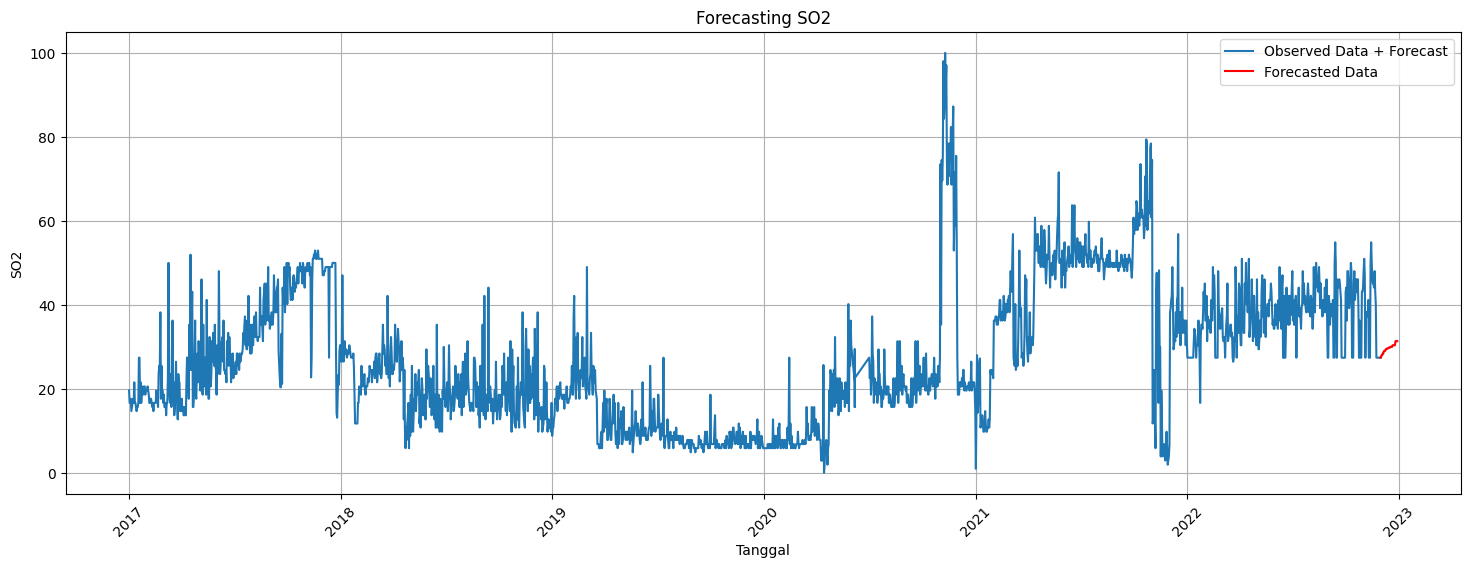

In [135]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['SO2'].min()
max_par = DKI2['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.114
MSE: 0.013
MAE: 0.098
R-Squared: -0.504
       Tanggal        SO2
0   2022-11-30  27.254902
1   2022-12-01  27.254902
2   2022-12-02  27.450980
3   2022-12-03  29.411765
4   2022-12-04  30.392157
5   2022-12-05  32.352941
6   2022-12-06  33.333333
7   2022-12-07  33.333333
8   2022-12-08  33.333333
9   2022-12-09  33.137255
10  2022-12-10  33.137255
11  2022-12-11  33.137255
12  2022-12-12  33.137255
13  2022-12-13  33.137255
14  2022-12-14  33.137255
15  2022-12-15  33.137255
16  2022-12-16  33.137255
17  2022-12-17  33.137255
18  2022-12-18  33.137255
19  2022-12-19  33.137255
20  2022-12-20  33.137255
21  2022-12-21  33.137255
22  2022-12-22  33.137255
23  2022-12-23  33.137255
24  2022-12-24  33.137255
25  2022-12-25  33.137255
26  2022-12-26  33.137255
27  2022-12-27  33.137255
28  2022-12-28  33.137255
29  2022-12-29  33.137255


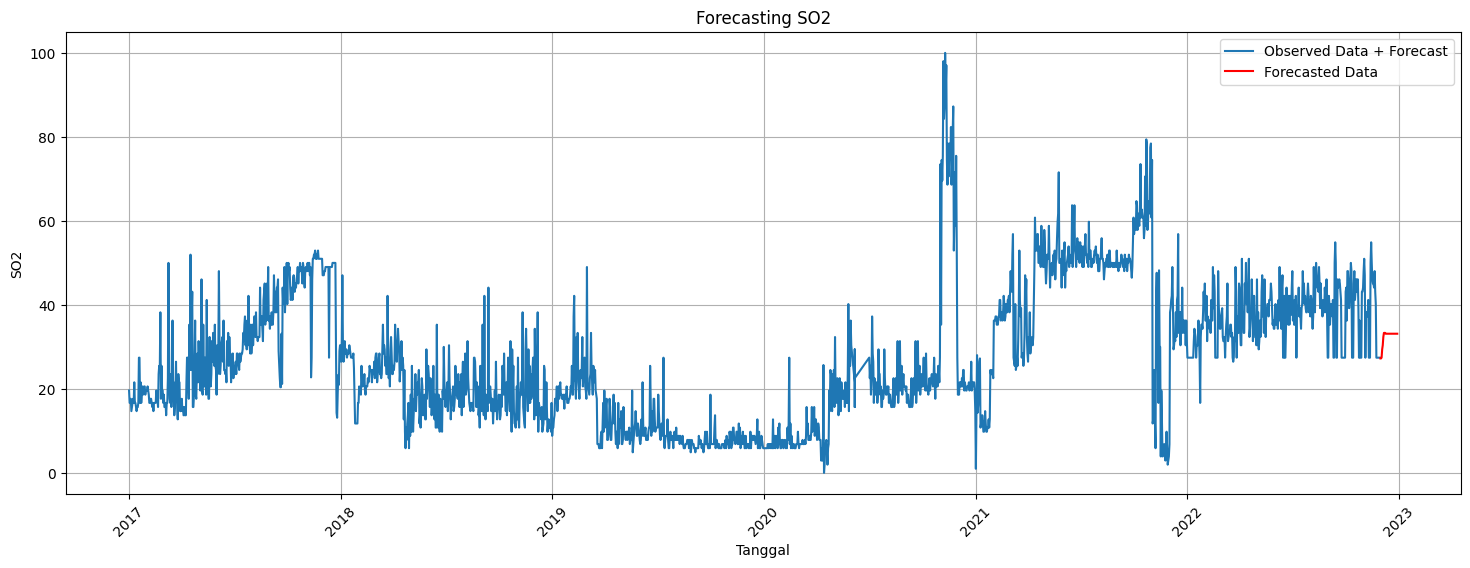

In [137]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['SO2'].min()
max_par = DKI2['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.205
MSE: 0.042
MAE: 0.182
R-Squared: -3.819
       Tanggal        SO2
0   2022-11-30  19.607843
1   2022-12-01  19.607843
2   2022-12-02  19.607843
3   2022-12-03  19.607843
4   2022-12-04  19.607843
5   2022-12-05  19.607843
6   2022-12-06  19.607843
7   2022-12-07  19.607843
8   2022-12-08  19.607843
9   2022-12-09  19.607843
10  2022-12-10  19.607843
11  2022-12-11  19.607843
12  2022-12-12  19.607843
13  2022-12-13  19.607843
14  2022-12-14  19.607843
15  2022-12-15  19.607843
16  2022-12-16  19.607843
17  2022-12-17  19.607843
18  2022-12-18  19.607843
19  2022-12-19  19.607843
20  2022-12-20  19.607843
21  2022-12-21  19.607843
22  2022-12-22  19.607843
23  2022-12-23  19.607843
24  2022-12-24  19.607843
25  2022-12-25  19.607843
26  2022-12-26  19.607843
27  2022-12-27  19.607843
28  2022-12-28  19.607843
29  2022-12-29  19.607843


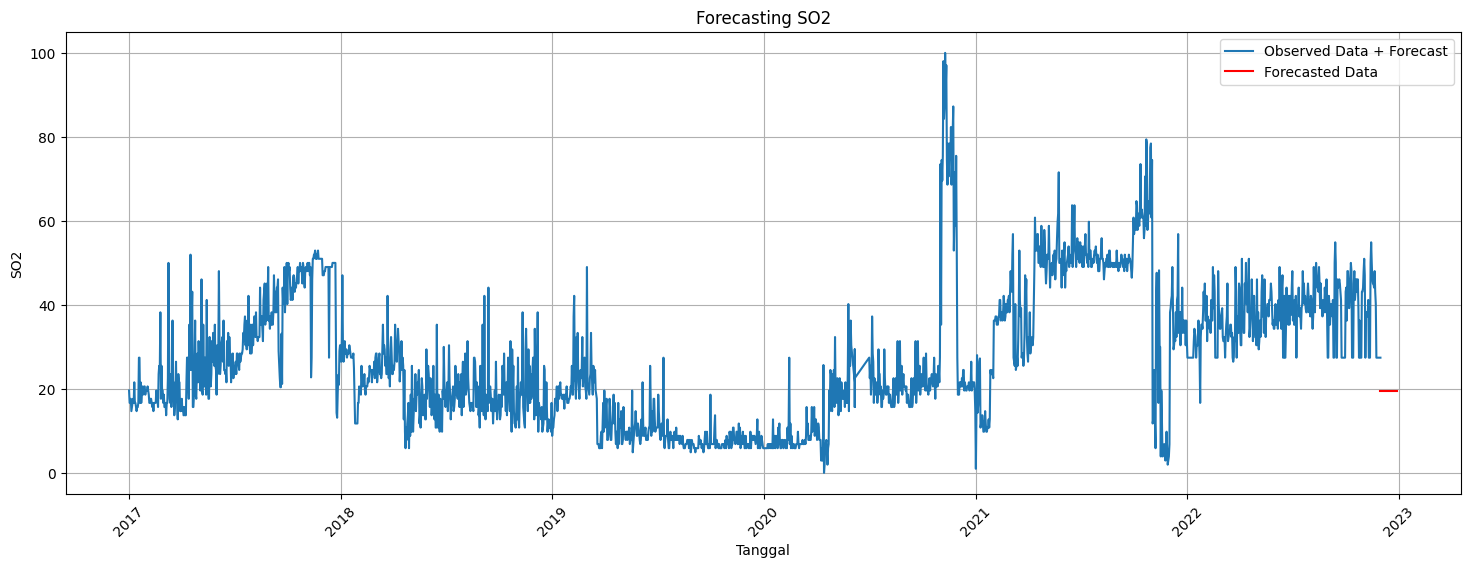

In [139]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['SO2'].min()
max_par = DKI2['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.171
MSE: 0.029
MAE: 0.143
R-Squared: -2.352
       Tanggal        SO2
0   2022-11-30  23.529412
1   2022-12-01  23.529412
2   2022-12-02  23.529412
3   2022-12-03  23.529412
4   2022-12-04  23.529412
5   2022-12-05  23.529412
6   2022-12-06  23.529412
7   2022-12-07  23.529412
8   2022-12-08  23.529412
9   2022-12-09  23.529412
10  2022-12-10  23.529412
11  2022-12-11  23.529412
12  2022-12-12  23.529412
13  2022-12-13  23.529412
14  2022-12-14  23.529412
15  2022-12-15  23.529412
16  2022-12-16  23.529412
17  2022-12-17  23.529412
18  2022-12-18  23.529412
19  2022-12-19  23.529412
20  2022-12-20  23.529412
21  2022-12-21  23.529412
22  2022-12-22  23.529412
23  2022-12-23  23.529412
24  2022-12-24  23.529412
25  2022-12-25  23.529412
26  2022-12-26  23.529412
27  2022-12-27  23.529412
28  2022-12-28  23.529412
29  2022-12-29  23.529412


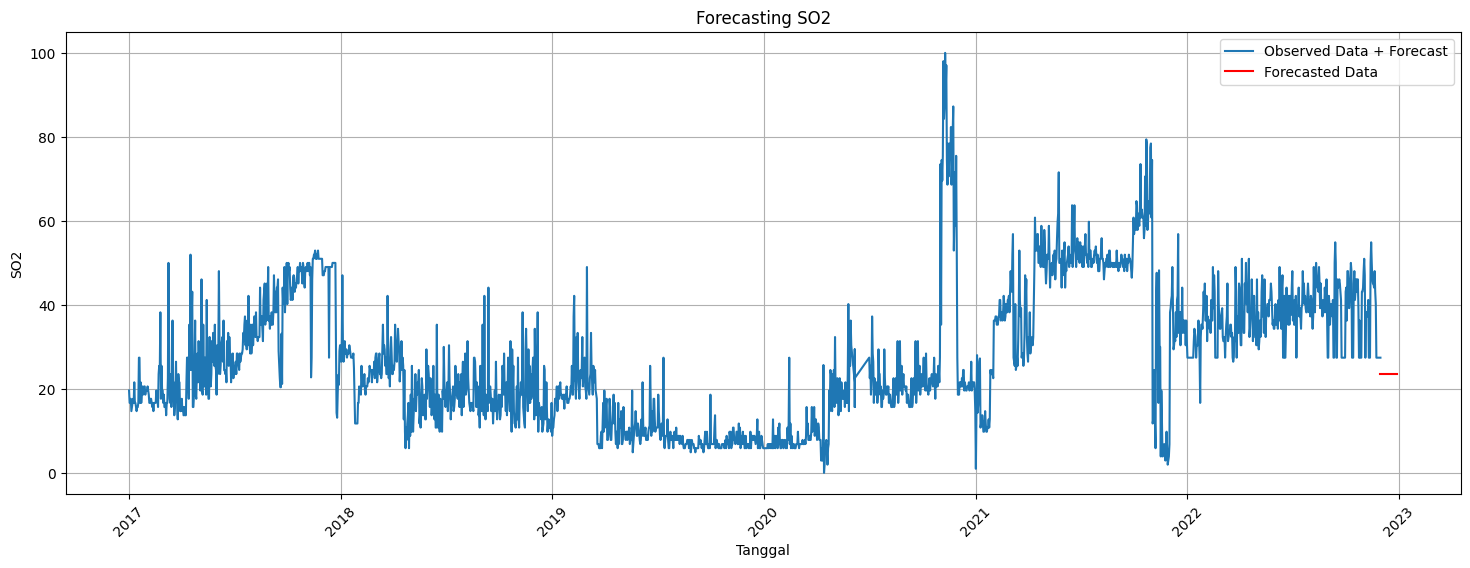

In [141]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['SO2'].min()
max_par = DKI2['SO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'SO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['SO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.172
MSE: 0.030
MAE: 0.145
R-Squared: -2.417
       Tanggal        SO2
0   2022-11-30  23.333333
1   2022-12-01  23.333333
2   2022-12-02  23.333333
3   2022-12-03  23.333333
4   2022-12-04  23.333333
5   2022-12-05  23.333333
6   2022-12-06  23.333333
7   2022-12-07  23.333333
8   2022-12-08  23.333333
9   2022-12-09  23.333333
10  2022-12-10  23.333333
11  2022-12-11  23.333333
12  2022-12-12  23.333333
13  2022-12-13  23.333333
14  2022-12-14  23.333333
15  2022-12-15  23.333333
16  2022-12-16  23.333333
17  2022-12-17  23.333333
18  2022-12-18  23.333333
19  2022-12-19  23.333333
20  2022-12-20  23.333333
21  2022-12-21  23.333333
22  2022-12-22  23.333333
23  2022-12-23  23.333333
24  2022-12-24  23.333333
25  2022-12-25  23.333333
26  2022-12-26  23.333333
27  2022-12-27  23.333333
28  2022-12-28  23.333333
29  2022-12-29  23.333333


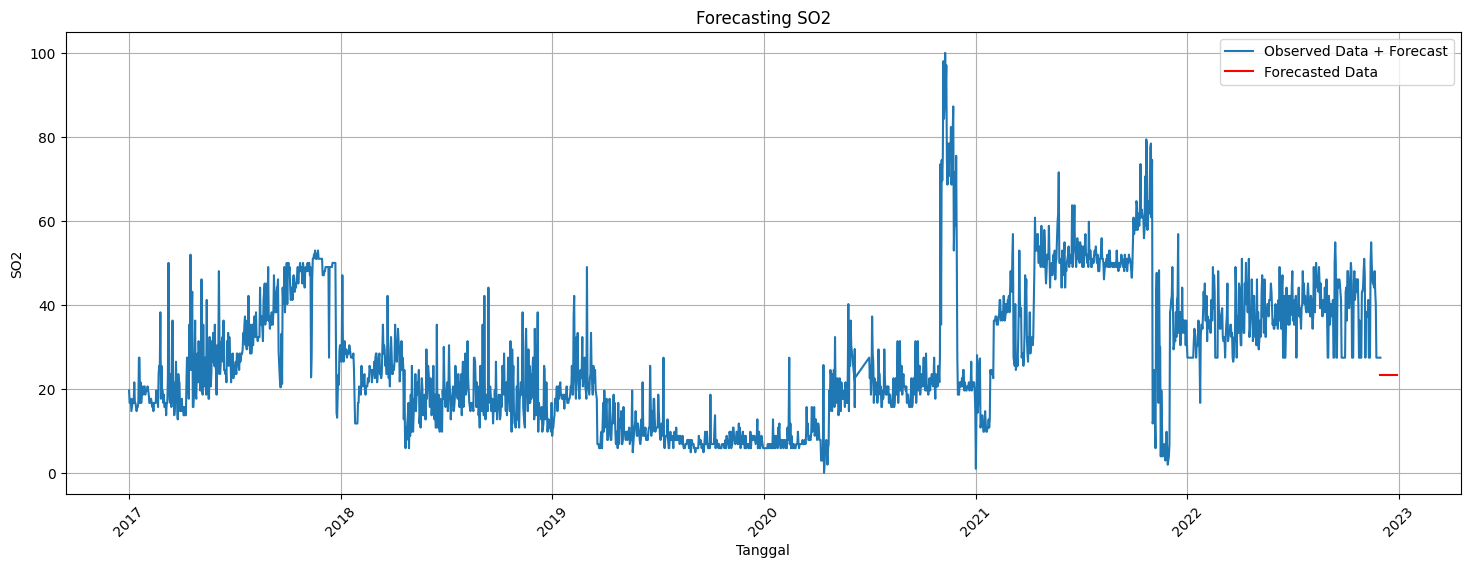

In [143]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'SO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'SO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['SO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('SO2')
plt.title('Forecasting SO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
